In [1]:
from keras.datasets import mnist
# 학습용과 검증용 분리
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터 전처리
# 28x28 => 784로 변환
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
print(y_train[:5])

[5 0 4 1 9]


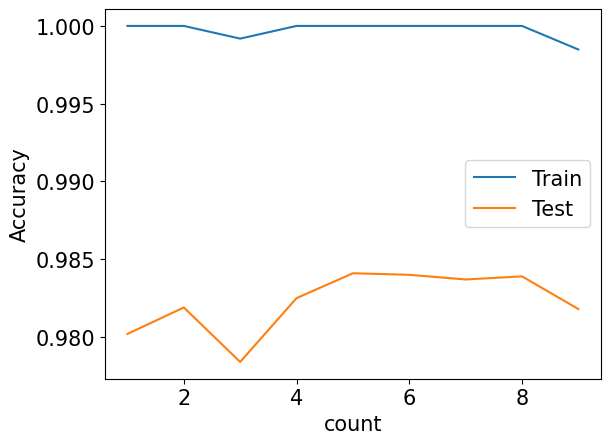

In [2]:
# 최적의 은닉노드 개수를 구하기 위한 실험
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=100,
        hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train,y_train)
        train_rate.append(model.score(X_train,y_train))
        test_rate.append(model.score(X_test,y_test))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [3]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('idx:',idx)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
            break
        cnt+=1

idx: 4
최적의 정확도: 0.9841
200 200
300 100


In [4]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(hidden_layer_sizes=[100,200],random_state=100)
model.fit(X_train,y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 1.0
검증용: 0.9819


In [5]:
#모형 저장
import pickle
pickle.dump(model, open('c:/data/mnist/mnist_ann.model', 'wb'))

In [6]:
# 모형 불러오기
model = pickle.load(open('c:/data/mnist/mnist_ann.model', 'rb'))
# 모형 사용
pred = model.predict(X_test[:10])
print('예측값:',pred[:10])
print('실제값:',y_test[:10])

예측값: [7 2 1 0 4 1 4 9 5 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


In [7]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
import pandas as pd
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
df_cm=pd.DataFrame(cm, index=range(10), columns=range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,971,1,0,2,1,0,1,1,3,0
1,0,1122,3,2,0,1,2,1,4,0
2,3,1,1011,2,2,0,4,3,5,1
3,0,0,3,994,1,1,0,2,1,8
4,3,0,1,0,965,0,4,2,0,7
5,2,0,0,9,2,871,3,1,3,1
6,2,2,2,1,3,3,943,0,2,0
7,2,4,7,1,1,0,0,1004,2,7
8,5,0,2,5,2,3,0,3,951,3
9,1,2,0,4,9,1,0,4,1,987


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

